In [49]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.datasets import make_classification as generate_dataset, make_regression as gen_reg_dataset
import time

In [2]:
def accuracy_score(y1,y2):
    #np.reshape(y1,y2.shape)
    count=0.0
    for i in range(len(y1)):
        if y1[i]==y2[i]:
            count+=1
    return count*100.0/len(y1)

In [3]:
N=1000
X,Y=generate_dataset(n_samples=1000, n_features=20)
Y=np.reshape(Y, (1000,1))

In [43]:
#test-train split
def test_train(X,Y,splitx=0.7):
    split=int(splitx*N)
    train_X=X[:split]
    train_Y=Y[:split]
    test_X=X[split:]
    ground_truth=Y[split:]
    #print(train_X.shape)
    #print(train_Y.shape)
    #print(test_X.shape)
    #print(ground_truth.shape)
    return [train_X, train_Y, test_X, ground_truth]

In [44]:
[train_X, train_Y, test_X, ground_truth]=test_train(X,Y)

In [12]:
#distance functions
def Euclidean(X,Y):#, ’Manhattan’ or ’Cosine’
    X=np.array(X)
    Y=np.array(Y)
    return (sum((X-Y)**2))**0.5

def Manhattan(X,Y):
    X=np.array(X)
    Y=np.array(Y)
    return sum(np.abs(X-Y))

def Cosine(X,Y):
    X=np.array(X)
    Y=np.array(Y)
    return 1-(sum(X*Y)/(np.linalg.norm(X)*np.linalg.norm(Y)))

In [39]:
#KNN Algorithm
def KNN_predict(train_X, train_Y, test_X, K=3, distance_metric=Euclidean, typ='classification'):
    predict=[]
    for x1 in test_X:
        distances=[]
        for index, x2 in enumerate(train_X):
            distances.append((index, distance_metric(x1,x2)))
        sorted_d=sorted(distances, key=lambda x: x[1])
        knn_classes=[]
        for i in sorted_d[:K]:
            knn_classes.append(train_Y[i[0]])
        if typ=='classification':
            predict.append(stats.mode(knn_classes).mode[0])
        else:
            predict.append(np.mean(knn_classes))
    return predict

In [13]:
for i in [Euclidean, Manhattan, Cosine]:
    test_pred=KNN_predict(train_X, train_Y, test_X, 8, distance_metric=i, typ='classification')
    print("Accuracy Score ",i, "=", accuracy_score(ground_truth, test_pred))

Accuracy Score  <function Euclidean at 0x7f2f26e95a60> = 85.0
Accuracy Score  <function Manhattan at 0x7f2f26e95bf8> = 89.0
Accuracy Score  <function Cosine at 0x7f2f26e951e0> = 86.33333333333333


## Regression

In [48]:
X,Y= gen_reg_dataset(n_samples=1000, n_features=20)
[train_X, train_Y, test_X, ground_truth]=test_train(X,Y)
for i in [Euclidean, Manhattan, Cosine]:
    test_pred=KNN_predict(train_X, train_Y, test_X, 8, distance_metric=i, typ='regression')
    print("RMSE Score ",i, "=", ( sum( (ground_truth-test_pred)**2 )/len(test_pred) ) **0.5)
print("\n\nTrain Errors:\n")
for i in [Euclidean, Manhattan, Cosine]:
    train_pred=KNN_predict(train_X, train_Y, train_X, 8, distance_metric=i, typ='regression')
    print("RMSE Score ",i, "=", ( sum( (train_Y-train_pred)**2 )/len(train_pred) ) **0.5)

RMSE Score  <function Euclidean at 0x7f2f26e95a60> = 108.02164229373966
RMSE Score  <function Manhattan at 0x7f2f26e95bf8> = 116.04601386452813
RMSE Score  <function Cosine at 0x7f2f26e951e0> = 99.47125583231728


Train Errors:

RMSE Score  <function Euclidean at 0x7f2f26e95a60> = 94.35345663791023
RMSE Score  <function Manhattan at 0x7f2f26e95bf8> = 97.5966121335789
RMSE Score  <function Cosine at 0x7f2f26e951e0> = 86.9461874531647


The train and test RMSE values are similar, hence denoting the reliability of the learned model

## 1b)

Finding the variation in runtime of the KNN classification algorithm with changing features and number of data points (Almost same for Regression case)

In [71]:
# for different dimension and constant number of data points
f_set=[]
f_time=[]
for f in range(5,100,3):
    X,Y=generate_dataset(n_samples=1000, n_features=f, n_informative=f-2)
    [train_X, train_Y, test_X, ground_truth]=test_train(X,Y)
    start=time.time()
    test_pred=KNN_predict(train_X, train_Y, test_X, K=8, distance_metric=i, typ='classification')
    end=time.time()
    f_set.append(f)
    f_time.append(end-start)

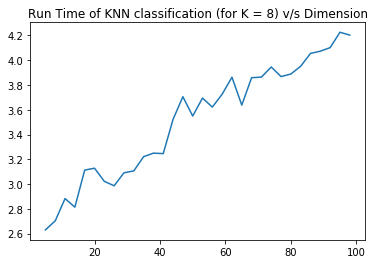

In [73]:
plt.title("Run Time of KNN classification (for K = 8) v/s Dimension")
plt.plot(f_set,f_time)

In [64]:
# for constant dimension and diff number of data points
N_set=[]
N_time=[]
for n in range(100,2000,50):
    X,Y=generate_dataset(n_samples=n)
    [train_X, train_Y, test_X, ground_truth]=test_train(X,Y)
    start=time.time()
    test_pred=KNN_predict(train_X, train_Y, test_X, K=8, distance_metric=i, typ='classification')
    end=time.time()
    N_set.append(n)
    N_time.append(end-start)

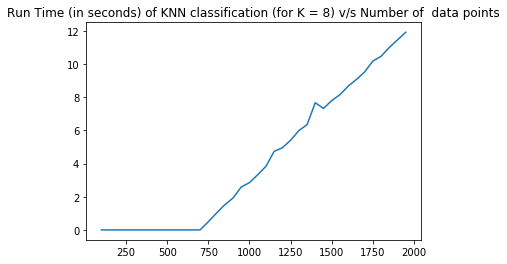

In [70]:
plt.title("Run Time (in seconds) of KNN classification (for K = 8) v/s Number of  data points")
plt.plot(N_set, N_time)